In [33]:
import pandas as pd
import scipy.stats  as stats
import seaborn as sns
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# from helpers import categorical_univariate  , categorical_bivariate


In [34]:
import sys
print(sys.path)

['d:\\intern\\Submissions\\Internships\\Gannat', 'c:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python310', '', 'C:\\Users\\Lenovo\\AppData\\Roaming\\Python\\Python310\\site-packages', 'C:\\Users\\Lenovo\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32', 'C:\\Users\\Lenovo\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32\\lib', 'C:\\Users\\Lenovo\\AppData\\Roaming\\Python\\Python310\\site-packages\\Pythonwin', 'c:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages']


In [35]:
pip install helpers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
# pip install statsmodels

In [37]:
# pip install sklearn.preprocessing 

In [38]:
# pip install scikit-learn

In [39]:
df = pd.read_csv("D:\\intern\\Submissions\\Internships\\Gannat\\EmployeeBurnout1.csv")

EDA

In [40]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52


In [41]:
df.shape

(22750, 9)

In [42]:
df.info

<bound method DataFrame.info of                     Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200       9/30/2008  Female      Service   
1          fffe3700360033003500      11/30/2008    Male      Service   
2      fffe31003300320037003900       3/10/2008  Female      Product   
3      fffe32003400380032003900       11/3/2008    Male      Service   
4      fffe31003900340031003600       7/24/2008  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      12/30/2008  Female      Service   
22746  fffe33003000350031003800       1/19/2008  Female      Product   
22747          fffe390032003000       11/5/2008    Male      Service   
22748  fffe33003300320036003900       1/10/2008  Female      Service   
22749      fffe3400350031003800        1/6/2008    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No            2  

In [43]:
df.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [44]:
Drows = df[df.duplicated()]
Drows

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate


In [45]:
df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [47]:
df = df.dropna() 

In [48]:
df.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [16]:
df.describe()

,Designation
count,22750.000000
mean,2.178725
std,1.135145
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


In [17]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation'],
      dtype='object')

Visualize Categorical Columns

In [18]:
df['Gender'].value_counts()

Gender
Female    11908
Male      10842
Name: count, dtype: int64

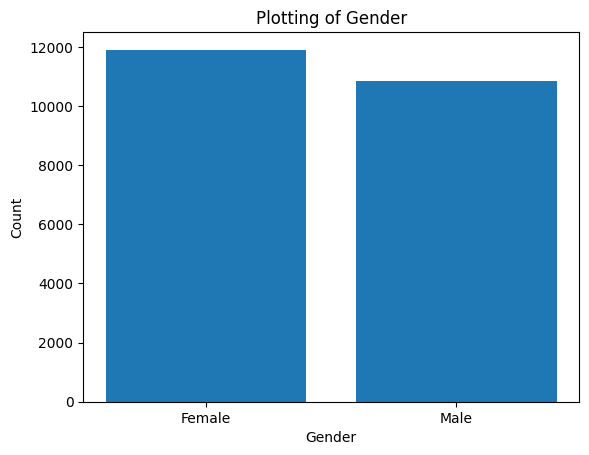

In [19]:
Gender_count = df['Gender'].value_counts()
plt.bar(Gender_count.index, Gender_count)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Plotting of Gender')
plt.show()

In [20]:
df['Company Type'].value_counts()

Company Type
Service    14833
Product     7917
Name: count, dtype: int64

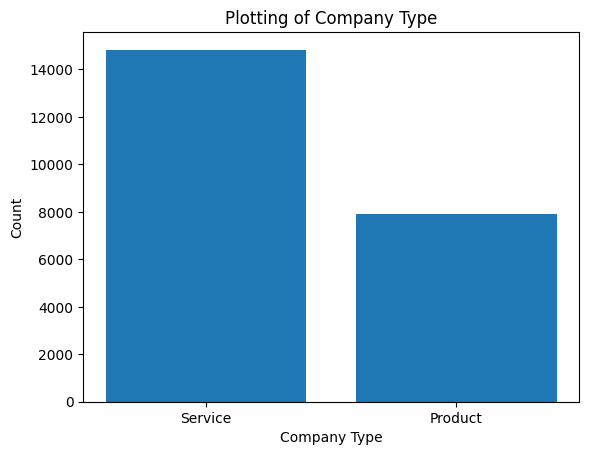

In [21]:
Ctype_count = df['Company Type'].value_counts()

plt.bar(Ctype_count.index, Ctype_count)
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.title('Plotting of Company Type')

plt.show()

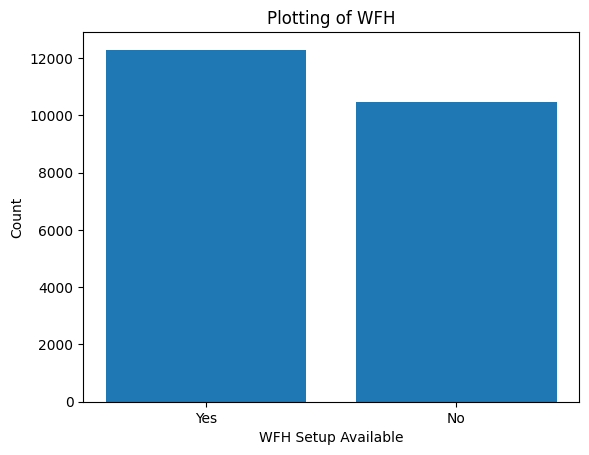

In [22]:
WFH_count = df['WFH Setup Available'].value_counts()

plt.bar(WFH_count.index, WFH_count)
plt.xlabel('WFH Setup Available')
plt.ylabel('Count')
plt.title('Plotting of WFH')
plt.show()

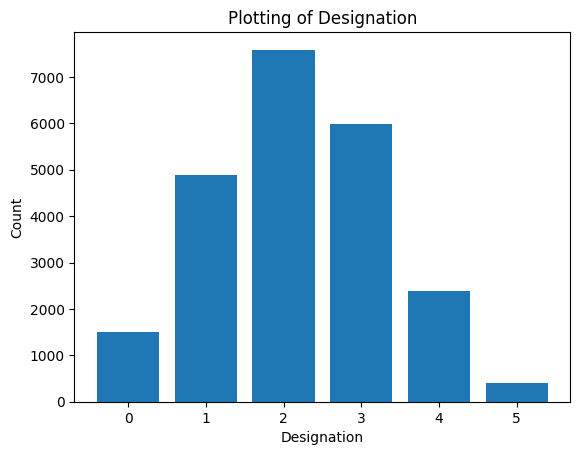

In [100]:
Designation_count = df['Designation'].value_counts()
plt.bar(Designation_count.index, Designation_count)
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Plotting of Designation')
plt.show()

Visualization To Check Normality

In [101]:
# pip install scipy

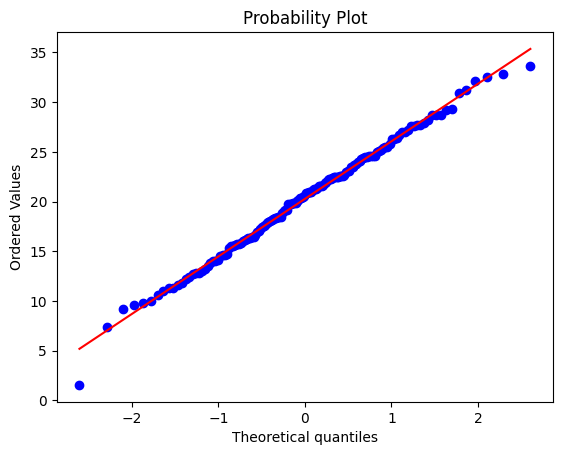

In [23]:

measure = np.random.normal(loc=20, scale=5, size=150)
stats.probplot(measure,dist='norm',plot=plt)
plt.show()

In [24]:
# pip install seaborn

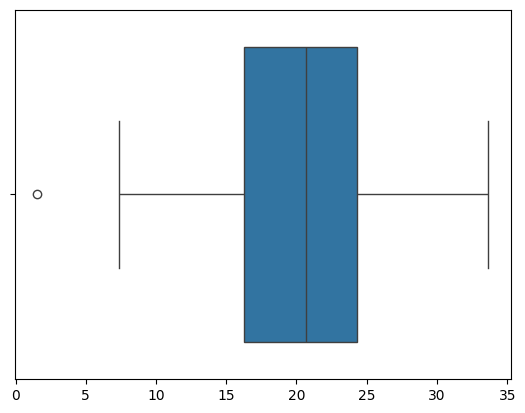

In [25]:

# measure = 
ax=sns.boxplot(x=measure)

Statistical Methods to check normality 

In [26]:


# # Assuming 'df' is your DataFrame
# # Flatten the DataFrame into a 1D array
# # data = df.values.flatten()

# # Perform Shapiro-Wilk test
# statistic, p_value = shapiro(data)

# # Print the results
# print(f'Shapiro-Wilk Test Statistic: {statistic}')
# print(f'p-value: {p_value}')

# # Interpret the results
# alpha = 0.05  # Significance level
# if p_value > alpha:
#     print('The data follows a normal distribution (fail to reject H0)')
# else:
#     print('The data does not follow a normal distribution (reject H0)')


As data is normal we will replace null values with mean

In [27]:
# df = df.fillna(df.mean(), inplace=True)
# df.isna().sum()


In [29]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3


Got an error because categorical values need to be numerical So we can fill the null values

In [30]:
encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':  
        df[column + '_LabelEncoded'] = encoder.fit_transform(df[column])
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13744\1655331784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_LabelEncoded'] = encoder.fit_transform(df[column])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13744\1655331784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_LabelEncoded'] = encoder.fit_transform(df[column])


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Employee ID_LabelEncoded,Date of Joining_LabelEncoded,Gender_LabelEncoded,Company Type_LabelEncoded,WFH Setup Available_LabelEncoded
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,7722,359,0,1,0
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,21062,85,1,1,1
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,2381,153,0,0,1
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,10790,84,1,1,1
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,6810,290,0,1,0


In [31]:
# df = df.drop(['Employee ID','Date of Joining_LabelEncoded','Company Type','WFH Setup Available'],axis=True)
df = df.drop(['Gender'], axis = True)
df.head()

,Employee ID,Date of Joining,Company Type,WFH Setup Available,Designation,Employee ID_LabelEncoded,Date of Joining_LabelEncoded,Gender_LabelEncoded,Company Type_LabelEncoded,WFH Setup Available_LabelEncoded
0,fffe32003000360033003200,9/30/2008,Service,No,2,7722,359,0,1,0
1,fffe3700360033003500,11/30/2008,Service,Yes,1,21062,85,1,1,1
2,fffe31003300320037003900,3/10/2008,Product,Yes,2,2381,153,0,0,1
3,fffe32003400380032003900,11/3/2008,Service,Yes,1,10790,84,1,1,1
4,fffe31003900340031003600,7/24/2008,Service,No,3,6810,290,0,1,0


In [110]:
df.dtypes

Employee ID                         object
Date of Joining                     object
Company Type                        object
WFH Setup Available                 object
Designation                          int64
Employee ID_LabelEncoded             int32
Date of Joining_LabelEncoded         int32
Gender_LabelEncoded                  int32
Company Type_LabelEncoded            int32
WFH Setup Available_LabelEncoded     int32
dtype: object

In [32]:
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])

df['Day'] = df['Date of Joining'].dt.day
df['Month'] = df['Date of Joining'].dt.month
df['Year'] = df['Date of Joining'].dt.year

df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df.head()


,Employee ID,Date of Joining,Company Type,WFH Setup Available,Designation,Employee ID_LabelEncoded,Date of Joining_LabelEncoded,Gender_LabelEncoded,Company Type_LabelEncoded,WFH Setup Available_LabelEncoded,Day,Month,Year
0,fffe32003000360033003200,2008-09-30,Service,No,2,7722,359,0,1,0,30,9,2008
1,fffe3700360033003500,2008-11-30,Service,Yes,1,21062,85,1,1,1,30,11,2008
2,fffe31003300320037003900,2008-03-10,Product,Yes,2,2381,153,0,0,1,10,3,2008
3,fffe32003400380032003900,2008-11-03,Service,Yes,1,10790,84,1,1,1,3,11,2008
4,fffe31003900340031003600,2008-07-24,Service,No,3,6810,290,0,1,0,24,7,2008


In [112]:
df = df.drop(['Date of Joining'],axis=True)

In [113]:
# df = df.fillna(df.mean())
# df.isna().sum()

In [114]:
df.isnull().sum()

Employee ID                         0
Company Type                        0
WFH Setup Available                 0
Designation                         0
Employee ID_LabelEncoded            0
Date of Joining_LabelEncoded        0
Gender_LabelEncoded                 0
Company Type_LabelEncoded           0
WFH Setup Available_LabelEncoded    0
Day                                 0
Month                               0
Year                                0
dtype: int64

Outliers

In [115]:
df.describe()

,Designation,Employee ID_LabelEncoded,Date of Joining_LabelEncoded,Gender_LabelEncoded,Company Type_LabelEncoded,WFH Setup Available_LabelEncoded,Day,Month,Year
count,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.0
mean,2.178725,11374.500000,183.401934,0.476571,0.652000,0.540220,15.760659,6.509978,2008.0
std,1.135145,6567.503648,106.099505,0.499462,0.476346,0.498391,8.769239,3.440477,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2008.0
25%,1.000000,5687.250000,91.000000,0.000000,0.000000,0.000000,8.000000,4.000000,2008.0
50%,2.000000,11374.500000,183.000000,0.000000,1.000000,1.000000,16.000000,7.000000,2008.0
75%,3.000000,17061.750000,276.000000,1.000000,1.000000,1.000000,23.000000,9.000000,2008.0
max,5.000000,22749.000000,365.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2008.0


In [117]:
# sns.distplot(df["Resource Allocation"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10756\3758313553.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Mental Fatigue Score"])


<Axes: xlabel='Mental Fatigue Score', ylabel='Density'>

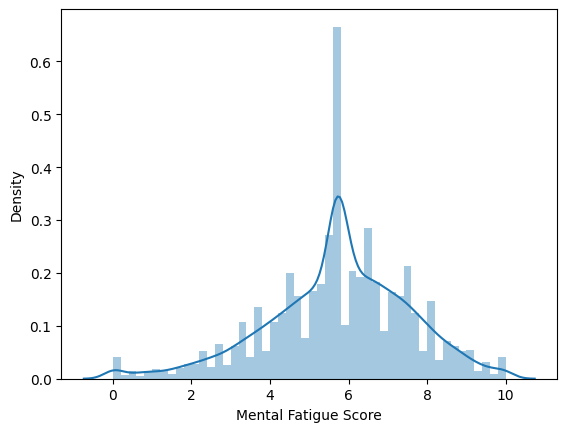

In [ ]:
sns.distplot(df["Mental Fatigue Score"])

Solving outliers

In [119]:
df.head()

,Employee ID,Company Type,WFH Setup Available,Designation,Employee ID_LabelEncoded,Date of Joining_LabelEncoded,Gender_LabelEncoded,Company Type_LabelEncoded,WFH Setup Available_LabelEncoded,Day,Month,Year
0,fffe32003000360033003200,Service,No,2,7722,359,0,1,0,30,9,2008
1,fffe3700360033003500,Service,Yes,1,21062,85,1,1,1,30,11,2008
2,fffe31003300320037003900,Product,Yes,2,2381,153,0,0,1,10,3,2008
3,fffe32003400380032003900,Service,Yes,1,10790,84,1,1,1,3,11,2008
4,fffe31003900340031003600,Service,No,3,6810,290,0,1,0,24,7,2008


In [118]:
upper_limit = df["Mental Fatigue Score"].mean() + 1.5*df["Mental Fatigue Score"].std()
lower_limit = df["Mental Fatigue Score"].mean() - 1.5*df["Mental Fatigue Score"].std()

print(upper_limit,lower_limit)

#applying trial and error method to get k
#11.21603060162202 0.24034510719395374 for k=3
#8.472109228015004 2.9842664808009705 for k=1.5 more Logical




KeyError: 'Mental Fatigue Score'

In [ ]:
new_df = df.loc[(df["Mental Fatigue Score"] < upper_limit) | (df["Mental Fatigue Score"] > lower_limit)]
new_df = df.loc[(df["Resource Allocation"] < upper_limit) | (df["Mental Fatigue Score"] > lower_limit)]

In [ ]:
print(len(df))
print(len(new_df))


22750
22750


In [ ]:
df.dropna()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Employee ID_LabelEncoded,Gender_LabelEncoded,Company Type_LabelEncoded,WFH Setup Available_LabelEncoded,Day,Month,Year
0,2,3.000000,3.800000,0.16,7722,0,1,0,30,9,2008
1,1,2.000000,5.000000,0.36,21062,1,1,1,30,11,2008
2,2,4.481398,5.800000,0.49,2381,0,0,1,10,3,2008
3,1,1.000000,2.600000,0.20,10790,1,1,1,3,11,2008
4,3,7.000000,6.900000,0.52,6810,0,1,0,24,7,2008
...,...,...,...,...,...,...,...,...,...,...,...
22745,1,3.000000,5.728188,0.41,4208,0,1,0,30,12,2008
22746,3,6.000000,6.700000,0.59,14934,0,0,1,19,1,2008
22747,3,7.000000,5.728188,0.72,22181,1,1,1,5,11,2008
22748,2,5.000000,5.900000,0.52,16875,0,1,0,10,1,2008


In [ ]:
corr_matrix = df.corr()
print(corr_matrix)
# eigenValues = np.linalg.eig(corr_matrix)
# print(eigenValues)

                                  Designation  Resource Allocation  \
Designation                          1.000000             0.852046   
Resource Allocation                  0.852046             1.000000   
Mental Fatigue Score                 0.656445             0.739268   
Burn Rate                            0.719284             0.811062   
Employee ID_LabelEncoded            -0.008586            -0.010464   
Gender_LabelEncoded                  0.113295             0.138806   
Company Type_LabelEncoded            0.006095             0.005659   
WFH Setup Available_LabelEncoded    -0.229720            -0.276284   
Day                                 -0.000114            -0.004915   
Month                               -0.000952            -0.000086   
Year                                      NaN                  NaN   

                                  Mental Fatigue Score  Burn Rate  \
Designation                                   0.656445   0.719284   
Resource Allocation  

In [ ]:
X = df.drop(columns=['Burn Rate']) 
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                           Variable        VIF
0                       Designation   3.672325
1               Resource Allocation   4.662415
2              Mental Fatigue Score   2.243176
3          Employee ID_LabelEncoded   1.000364
4               Gender_LabelEncoded   1.024160
5         Company Type_LabelEncoded   1.000225
6  WFH Setup Available_LabelEncoded   1.093315
7                               Day   1.000266
8                             Month   1.000167
9                              Year  26.759204


In [ ]:
highly_correlated_variables = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            variable1 = corr_matrix.columns[i]
            variable2 = corr_matrix.columns[j]
            pair = (variable1, variable2)
            highly_correlated_variables.add(pair)

print("\nHighly Correlated Variables:")
for pair in highly_correlated_variables:
    print(pair)


Highly Correlated Variables:
('Resource Allocation', 'Designation')
('Burn Rate', 'Mental Fatigue Score')
('Mental Fatigue Score', 'Resource Allocation')
('Burn Rate', 'Resource Allocation')
('Burn Rate', 'Designation')


Applying PCA 

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
pca = PCA()
pca.fit(scaled_data)

PCA()

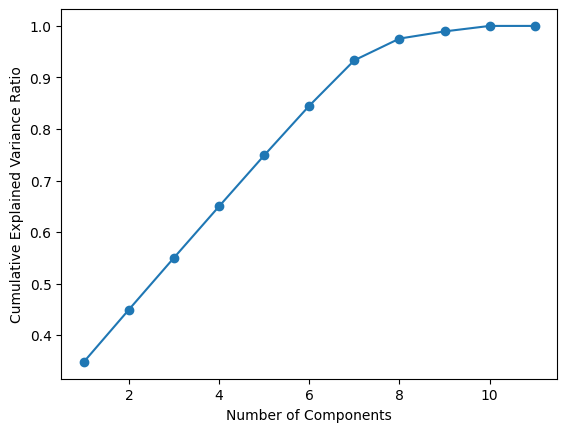

In [ ]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [ ]:
loadings = pd.DataFrame(pca.components_, columns=df.columns)
print("Principal Components Loadings:")
print(loadings)

Principal Components Loadings:
    Designation  Resource Allocation  Mental Fatigue Score  Burn Rate  \
0      0.466881             0.496361              0.477552   0.499554   
1     -0.025649            -0.020363             -0.009274  -0.013601   
2     -0.033675            -0.022523             -0.020356  -0.013977   
3     -0.002841            -0.003952              0.003063   0.000099   
4     -0.012351            -0.006086             -0.005910  -0.003614   
5      0.095861             0.071983              0.051798   0.047017   
6      0.138259             0.100464              0.084110   0.062946   
7      0.625824             0.331257             -0.594427  -0.375927   
8      0.572263            -0.675061              0.389586  -0.252700   
9      0.180621            -0.414654             -0.506480   0.733963   
10     0.000000             0.000000              0.000000   0.000000   

    Employee ID_LabelEncoded  Gender_LabelEncoded  Company Type_LabelEncoded  \
0           

In [ ]:
loadings.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Employee ID_LabelEncoded,Gender_LabelEncoded,Company Type_LabelEncoded,WFH Setup Available_LabelEncoded,Day,Month,Year
0,0.466881,0.496361,0.477552,0.499554,-0.008241,0.112529,0.002688,-0.212831,-0.001711,0.000347,0.0
1,-0.025649,-0.020363,-0.009274,-0.013601,0.594083,0.242608,-0.405826,-0.058553,0.380469,0.523435,-0.0
2,-0.033675,-0.022523,-0.020356,-0.013977,0.257505,0.324940,-0.538673,-0.045973,-0.574170,-0.451554,-0.0
3,-0.002841,-0.003952,0.003063,0.000099,-0.557619,-0.068366,-0.651040,-0.035235,0.473098,-0.188250,-0.0
4,-0.012351,-0.006086,-0.005910,-0.003614,-0.428342,0.000681,-0.217808,-0.043435,-0.530582,0.696735,0.0


Feature Selection

In [ ]:
pca = PCA(n_components=7)  
pca.fit(X)

X_pca = pca.transform(X)

In [ ]:
loadings = pca.components_
abs_loadings = np.abs(loadings)
important_features = np.argmax(abs_loadings, axis=1)

In [ ]:
print(important_features)

[3 7 8 1 2 0 4]


Splitting the Data into X and y

In [ ]:
X = np.array(df.drop(["Burn Rate"], axis=True))
y = df["Burn Rate"]
# selected_features = X[:, [3, 7, 8, 1, 2, 0, 4]]
important_indices = [3, 7, 8, 1, 2, 0, 4]

selected_features = X[:, important_indices]
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size = 0.2, random_state=42)

Modeling

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(mse, r2)

0.006134854639720604 0.8295616311843736


Comparing Training accuracy against validation accuracy

In [ ]:
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


In [ ]:
print(mse_train, r2_train)


0.006411991743333855 0.8298735561054903


Linear Regression from scratch

In [52]:
# equation : y = ax +b

# a for slope(weights)
# b for intercept(bias)

x = df['Mental Fatigue Score'] 
y = df['Burn Rate']
X_mean = x.mean()

# print(X_mean)

y_mean = y.mean()
# print(y_mean)

0.4524443249058634


In [69]:
#calculating covraiance and variance
def LinearRegression(X, y):

    n = len(x)
    X_values = np.array(x)
    y_Values = np.array(y)
    result = []
    for i in range(len(X_values)-1):
        cov = (1/n) * (X_values[i]-X_mean)*(y_Values[i]- y_mean)
        var = (1/n) * (X_values[i]-X_mean)**2
        slope = cov/var
        intercept = y_mean - (slope*X_mean)
        result.append(slope*X_values[i] + intercept)
    return(result)


In [72]:
LinearRegression(df['Mental Fatigue Score'], df['Burn Rate'])


[0.16000000000000003,
 0.36,
 0.2,
 0.52,
 0.29,
 0.62,
 0.33,
 0.5,
 0.11999999999999997,
 0.5100000000000007,
 0.32000000000000006,
 0.3900000000000001,
 0.59,
 0.21999999999999997,
 0.57,
 0.47,
 0.46,
 0.43999999999999995,
 0.6,
 0.46,
 0.20000000000000007,
 0.19999999999999996,
 0.19000000000000006,
 0.31000000000000005,
 0.81,
 0.39,
 0.41999999999999993,
 0.19000000000000006,
 0.56,
 0.53,
 0.32999999999999985,
 0.45,
 0.3600000000000003,
 0.59,
 0.9400000000000001,
 0.36999999999999966,
 0.6500000000000001,
 0.49,
 0.3799999999999999,
 0.6200000000000001,
 0.3900000000000001,
 0.15000000000000008,
 0.61,
 0.26,
 0.2800000000000001,
 0.7099999999999999,
 0.5699999999999998,
 0.39000000000000007,
 0.61,
 0.62,
 0.8,
 0.6300000000000001,
 0.5999999999999999,
 0.79,
 0.39,
 0.3600000000000003,
 0.5,
 0.72,
 0.33999999999999997,
 0.27,
 0.66,
 0.27,
 0.6699999999999999,
 0.38,
 0.28,
 0.05,
 0.22000000000000003,
 0.39,
 0.52,
 0.38999999999999996,
 0.11000000000000001,
 0.44,
 0.499

In [73]:
df['Burn Rate']

0        0.16
1        0.36
3        0.20
4        0.52
5        0.29
         ... 
22743    0.48
22744    0.54
22746    0.59
22748    0.52
22749    0.61
Name: Burn Rate, Length: 18590, dtype: float64

In [68]:
arr = []
for i in range(0,3):
    arr.append(1)
print(arr)

[1, 1, 1]
